In [1]:
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix


Load CIFAR-10 dataset

[CIFAR-10-Dataset](https://www.tensorflow.org/datasets/catalog/cifar10)


In [5]:

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [6]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
x_test.shape

(10000, 32, 32, 3)

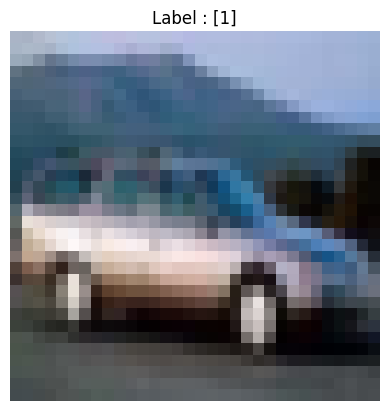

In [8]:
plt.imshow(x_train[4])
plt.title(f"Label : {y_train[4]}")
plt.axis('off')
plt.show()

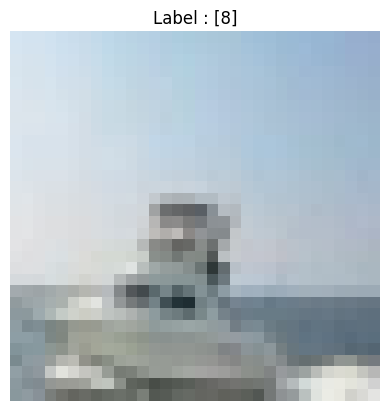

In [9]:
plt.imshow(x_train[100], cmap='gray')
plt.title(f"Label : {y_train[100]}")
plt.axis('off')
plt.show()

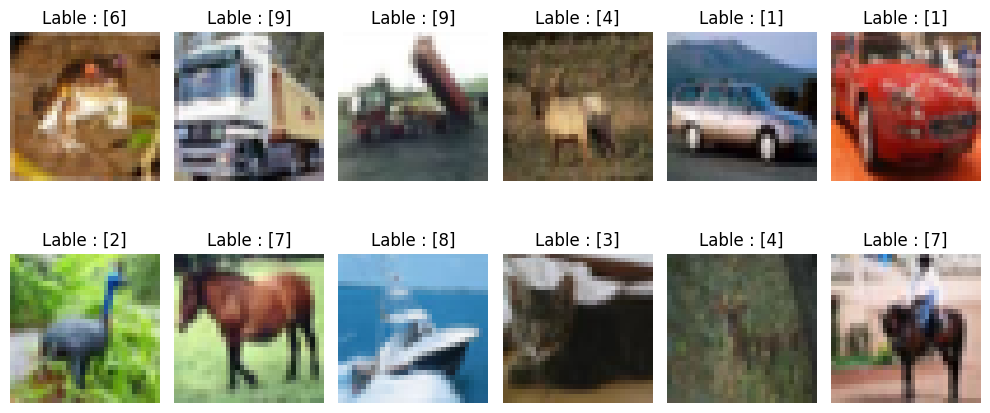

In [13]:
plt.figure(figsize=(10,5))

for i in range(12):
    plt.subplot(2,6, i + 1)
    plt.imshow(x_train[i])
    plt.title(f"Lable : {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


## Normalize pixel values to the range [0, 1]

In [14]:
x_train, x_test = x_train / 255.0, x_test / 255.0



## Convert labels to one-dimensional arrays

In [15]:
y_train.shape

(50000, 1)

In [16]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [17]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)


Create the model

In [23]:
cnn_model = models.Sequential()

# First Convolutional Block

cnn_model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32, 3)))

cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPooling2D((2,2)))


# Second Convolutional Block

cnn_model.add(layers.Conv2D(128, (3,3), activation='relu'))
cnn_model.add(layers.BatchNormalization())

# Fully  Connected Layer

cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(128, activation='relu'))
cnn_model.add(layers.Dropout(0.5))
cnn_model.add(layers.Dense(10, activation='softmax'))

cnn_model.summary()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 13, 13, 128)    │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 13, 13, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     2,769,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,808,842 (10.71 MB)

 Trainable params: 2,808,522 (10.71 MB)

 Non-trainable params: 320 (1.25 KB)


Compile the Model

In [24]:
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = cnn_model.fit(x_train, y_train, epochs =10, batch_size=64, validation_split=0.2, verbose=1)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 82ms/step - accuracy: 0.3410 - loss: 2.9014 - val_accuracy: 0.4241 - val_loss: 1.6446
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.5571 - loss: 1.2608 - val_accuracy: 0.5684 - val_loss: 1.2853
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.6366 - loss: 1.0331 - val_accuracy: 0.5843 - val_loss: 1.1798
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.6914 - loss: 0.8723 - val_accuracy: 0.6009 - val_loss: 1.2622
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.7366 - loss: 0.7384 - val_accuracy: 0.6257 - val_loss: 1.1268
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 76ms/step - accuracy: 0.7669 - loss: 0.6529 - val_accuracy: 0.6697 - val_loss: 0.9725
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.7974 - loss: 0.5685 - val_accuracy: 0.6633 - val_loss: 1.0966
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 79ms/step - accuracy: 0.8225 - loss: 0.4962 - 


Evaluate on test data

In [25]:
test_loss, test_acc = cnn_model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy : {test_acc:.2f}")


313/313 - 2s - 6ms/step - accuracy: 0.6542 - loss: 1.3963
Test accuracy : 0.65


In [26]:
class_names = ['Airplane', 'automobil', 'bird', 'cat', 'deer', 'dog','frog', 'horse', 'ship','truck']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


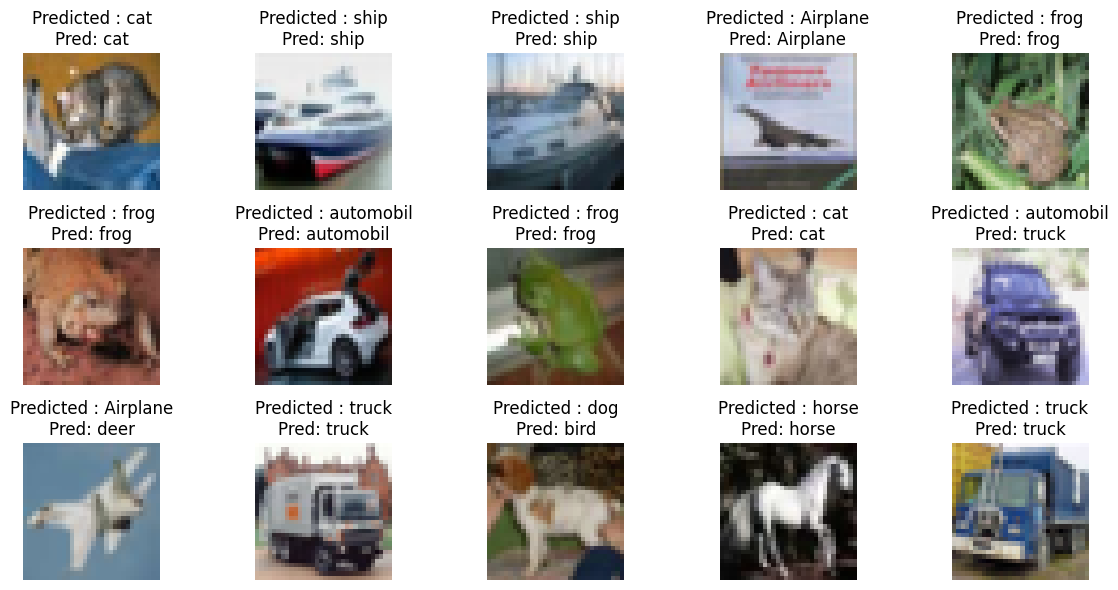

In [30]:
sample_images = x_test[:15]
sample_labels = y_test[:15]

predictions = np.argmax(cnn_model.predict(sample_images), axis=1)

plt.figure(figsize=(12,6))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(sample_images[i])
    plt.title(f"Predicted : {class_names[sample_labels[i]]}\nPred: {class_names[predictions[i]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## Plot accuracy and loss

Text(0.5, 1.0, 'Training and Validation Loss ')

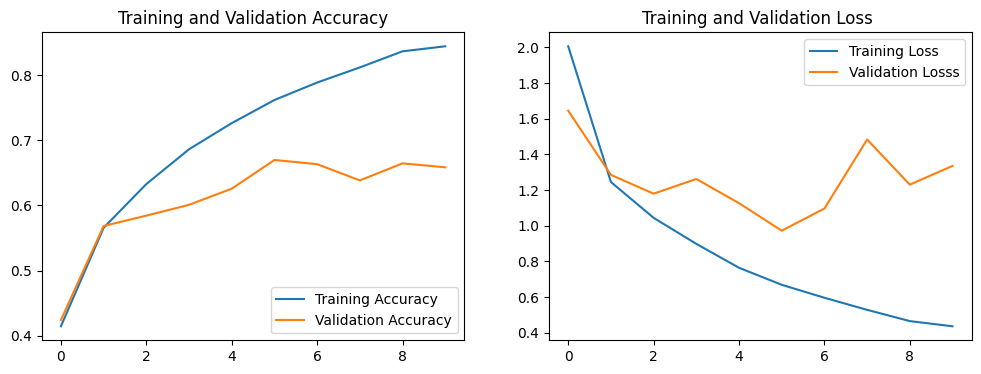

In [32]:
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Losss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss ')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


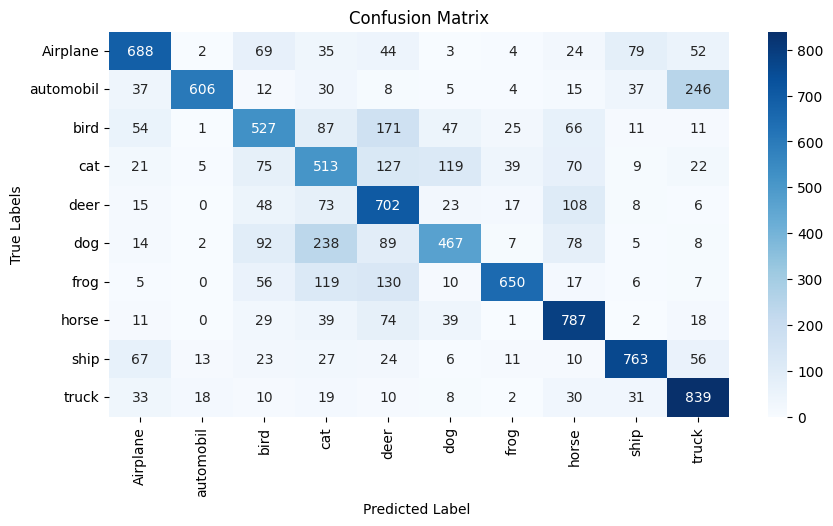

In [36]:
y_pred = np.argmax(cnn_model.predict(x_test),axis=1)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels = class_names)
plt.xlabel('Predicted Label ')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Generate a classification report

In [37]:
report = classification_report(y_test, y_pred, target_names=class_names)
print(report)

              precision    recall  f1-score   support

    Airplane       0.73      0.69      0.71      1000
   automobil       0.94      0.61      0.74      1000
        bird       0.56      0.53      0.54      1000
         cat       0.43      0.51      0.47      1000
        deer       0.51      0.70      0.59      1000
         dog       0.64      0.47      0.54      1000
        frog       0.86      0.65      0.74      1000
       horse       0.65      0.79      0.71      1000
        ship       0.80      0.76      0.78      1000
       truck       0.66      0.84      0.74      1000

    accuracy                           0.65     10000
   macro avg       0.68      0.65      0.66     10000
weighted avg       0.68      0.65      0.66     10000



## 
Save the Model

In [39]:

cnn_model.save('cnn_cifar10_model.h5')
print("Model saved as 'cnn_cifar10_model.h5'")

Model saved as 'cnn_cifar10_model.h5'


## 
Load and Use the Model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


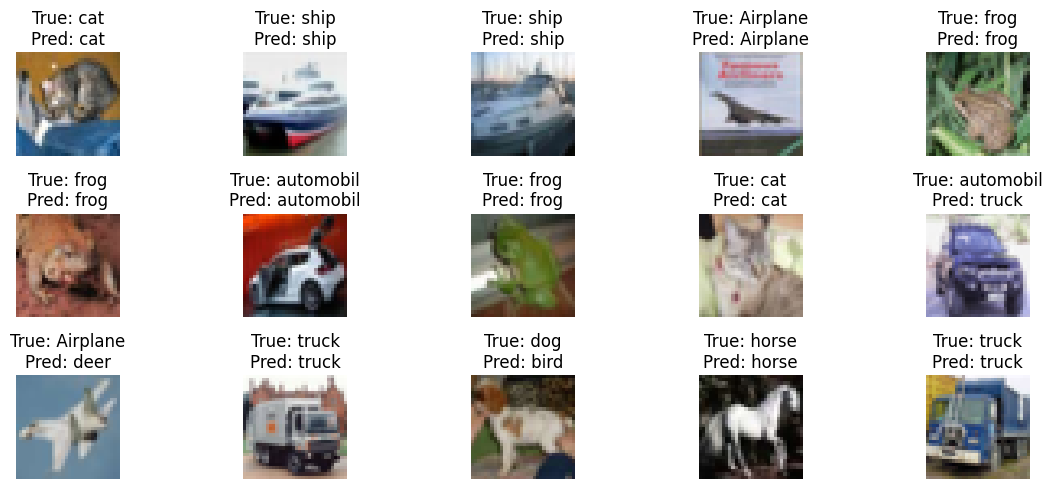

In [40]:
load_model = tf.keras.models.load_model('cnn_cifar10_model.h5')

sample_images == x_test[:15]
sample_labels = y_test[:15]

predictions = np.argmax(load_model.predict(sample_images), axis=1)


plt.figure(figsize=(12,5))

for i in range(15):
    plt.subplot(3,5, i+ 1)
    plt.imshow(sample_images[i])
    plt.title(f"True: {class_names[sample_labels[i]]}\nPred: {class_names[predictions[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()